In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random as rd
import cv2, os

from sklearn.model_selection import train_test_split
from sklearn.metrics import *
from sklearn.preprocessing import StandardScaler, MinMaxScaler

from tensorflow import keras
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from keras.backend import clear_session
from tensorflow.keras.optimizers import Adam

In [47]:
# 학습곡선 함수
def dl_history_plot(history):
    plt.figure(figsize=(10,6))
    plt.plot(history['loss'], label='train_err')
    plt.plot(history['val_loss'], label='val_err')

    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend()
    plt.grid()
    plt.show()

In [48]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [60]:
path = '/content/drive/MyDrive/minipjt7/data/sign_language2.csv'

data = pd.read_csv(path)
data.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [61]:
data.shape

(27508, 785)

In [62]:
import string
class_names = list(string.ascii_lowercase)
len(class_names), class_names

(26,
 ['a',
  'b',
  'c',
  'd',
  'e',
  'f',
  'g',
  'h',
  'i',
  'j',
  'k',
  'l',
  'm',
  'n',
  'o',
  'p',
  'q',
  'r',
  's',
  't',
  'u',
  'v',
  'w',
  'x',
  'y',
  'z'])

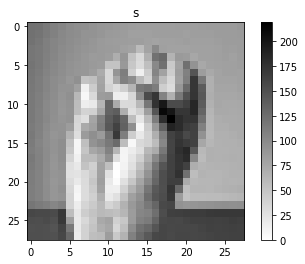

In [63]:
n = 10
sign_fig = data.iloc[n, 1:].values
sign_fig = sign_fig.reshape(28, 28)

sign = class_names[data.iloc[n,0]]

plt.title(sign)
plt.imshow(255-sign_fig, cmap=plt.cm.binary)
plt.colorbar()
plt.show()

In [64]:
target = 'label'
x = data.drop(target, axis = 1)
y = data.loc[:, target]

In [65]:
x_train, x_val, y_train, y_val = train_test_split(x, y, train_size = 20000, random_state = 2022)

In [66]:
x_train.shape, x_val.shape

((20000, 784), (7508, 784))

In [67]:
x_train2, x_val2, y_train2, y_val2 = x_train.values, x_val.values, y_train.values, y_val.values

In [68]:
x_train2 = x_train2.reshape(20000,28,28,1)
x_val2 = x_val2.reshape(7508,28,28,1)

In [69]:
x_train2.shape, x_val2.shape

((20000, 28, 28, 1), (7508, 28, 28, 1))

In [70]:
x_train2 = x_train2 / 255.
x_val2 = x_val2 / 255.

### (1)모델링1 : RandomForestClassifier

* catboost

In [71]:
from sklearn.ensemble import RandomForestClassifier

m1 = RandomForestClassifier()
m1.fit(x_train.values, y_train.values)
p1 = m1.predict(x_val.values)

cn = np.array(class_names)

print(accuracy_score(y_val,p1))
print('-'*60)
print(confusion_matrix(y_val, p1))
print('-'*60)
print(classification_report(cn[y_val], cn[p1]))

0.9934736281299946
------------------------------------------------------------
[[320   0   0   0   0   1   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0]
 [  0 255   0   0   1   0   0   1   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0]
 [  0   0 297   0   0   1   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0]
 [  0   0   0 307   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0]
 [  0   0   0   0 264   0   0   0   1   0   0   1   0   0   0   0   0   0
    0   0   0   0   0   0]
 [  0   0   0   0   0 339   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0]
 [  0   0   0   0   0   0 306   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0]
 [  0   0   0   0   0   0   0 293   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   1 301   1   0   1   0   0   1   0   0   1
    0   0   0   0   0   1]
 [  0   0  

### (2) 모델링2 : CNN

In [72]:
clear_session()

m2 = Sequential([Conv2D(32, kernel_size=3, input_shape=(28, 28, 1), padding='same', strides =1, activation='relu'),
                    MaxPooling2D(pool_size=2, strides=2),
                    Flatten(),
                    Dense(128, activation = 'relu'),
                    Dense(25, activation='softmax')
])

m2.summary()

m2.compile(optimizer = 'adam', loss='sparse_categorical_crossentropy')

history = m2.fit(x_train2, y_train2, epochs = 10, validation_split=0.2).history

p2 = m2.predict(x_val2)
p2_1 = p2.argmax(axis=1)

cn = np.array(class_names)

print(accuracy_score(y_val,p2_1))
print('-'*60)
print(confusion_matrix(y_val, p2_1))
print('-'*60)
print(classification_report(cn[y_val], cn[p2_1]))

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 6272)              0         
                                                                 
 dense (Dense)               (None, 128)               802944    
                                                                 
 dense_1 (Dense)             (None, 25)                3225      
                                                                 
Total params: 806,489
Trainable params: 806,489
Non-trainable params: 0
__________________________________________________

### (3) 모델링 3 : XGBoost

In [73]:
from xgboost import XGBClassifier

m3 = XGBClassifier()
m3.fit(x_train.values, y_train.values)
p3 = m3.predict(x_val.values)

cn = np.array(class_names)

print(accuracy_score(y_val,p3))
print('-'*60)
print(confusion_matrix(y_val, p3))
print('-'*60)
print(classification_report(cn[y_val], cn[p3]))

0.9508524240809803
------------------------------------------------------------
[[310   0   0   0   1   0   0   0   0   0   0   0   2   2   1   0   0   4
    0   0   0   0   0   1]
 [  0 253   0   0   0   0   0   0   0   0   0   0   0   0   0   0   1   0
    0   1   0   0   0   2]
 [  0   0 291   0   0   0   0   0   0   0   3   0   0   0   0   1   0   0
    2   0   0   0   0   1]
 [  0   0   0 289   0   0   0   0   0   2   0   0   4   0   0   0   3   0
    0   2   2   0   5   0]
 [  0   1   0   0 260   0   0   0   0   0   0   2   0   0   0   0   0   2
    0   0   0   0   0   1]
 [  0   0   0   0   0 330   0   0   0   1   0   0   0   1   0   0   1   0
    5   1   0   0   0   0]
 [  0   0   0   0   0   0 289   1   2   0   0   0   0   1   0   0   3   0
    8   0   0   0   0   2]
 [  0   0   0   0   0   0   3 283   0   0   2   0   0   0   0   1   0   2
    2   0   0   0   0   0]
 [  5   0   0   0   0   0   0   1 288   1   0   0   0   0   1   0   1   5
    0   0   0   1   0   4]
 [  0   0  

### (4) 모델링4 : LightGBM

In [74]:
from lightgbm import LGBMClassifier

m4 = XGBClassifier()
m4.fit(x_train.values, y_train.values)
p4 = m4.predict(x_val.values)

cn = np.array(class_names)

print(accuracy_score(y_val,p4))
print('-'*60)
print(confusion_matrix(y_val, p4))
print('-'*60)
print(classification_report(cn[y_val], cn[p4]))

0.9508524240809803
------------------------------------------------------------
[[310   0   0   0   1   0   0   0   0   0   0   0   2   2   1   0   0   4
    0   0   0   0   0   1]
 [  0 253   0   0   0   0   0   0   0   0   0   0   0   0   0   0   1   0
    0   1   0   0   0   2]
 [  0   0 291   0   0   0   0   0   0   0   3   0   0   0   0   1   0   0
    2   0   0   0   0   1]
 [  0   0   0 289   0   0   0   0   0   2   0   0   4   0   0   0   3   0
    0   2   2   0   5   0]
 [  0   1   0   0 260   0   0   0   0   0   0   2   0   0   0   0   0   2
    0   0   0   0   0   1]
 [  0   0   0   0   0 330   0   0   0   1   0   0   0   1   0   0   1   0
    5   1   0   0   0   0]
 [  0   0   0   0   0   0 289   1   2   0   0   0   0   1   0   0   3   0
    8   0   0   0   0   2]
 [  0   0   0   0   0   0   3 283   0   0   2   0   0   0   0   1   0   2
    2   0   0   0   0   0]
 [  5   0   0   0   0   0   0   1 288   1   0   0   0   0   1   0   1   5
    0   0   0   1   0   4]
 [  0   0  

### (5) 모델링5 : Adaboost

In [75]:
from sklearn.ensemble import AdaBoostClassifier

m5 = XGBClassifier()
m5.fit(x_train.values, y_train.values)
p5 = m5.predict(x_val.values)

cn = np.array(class_names)

print(accuracy_score(y_val,p5))
print('-'*60)
print(confusion_matrix(y_val, p5))
print('-'*60)
print(classification_report(cn[y_val], cn[p5]))

0.9508524240809803
------------------------------------------------------------
[[310   0   0   0   1   0   0   0   0   0   0   0   2   2   1   0   0   4
    0   0   0   0   0   1]
 [  0 253   0   0   0   0   0   0   0   0   0   0   0   0   0   0   1   0
    0   1   0   0   0   2]
 [  0   0 291   0   0   0   0   0   0   0   3   0   0   0   0   1   0   0
    2   0   0   0   0   1]
 [  0   0   0 289   0   0   0   0   0   2   0   0   4   0   0   0   3   0
    0   2   2   0   5   0]
 [  0   1   0   0 260   0   0   0   0   0   0   2   0   0   0   0   0   2
    0   0   0   0   0   1]
 [  0   0   0   0   0 330   0   0   0   1   0   0   0   1   0   0   1   0
    5   1   0   0   0   0]
 [  0   0   0   0   0   0 289   1   2   0   0   0   0   1   0   0   3   0
    8   0   0   0   0   2]
 [  0   0   0   0   0   0   3 283   0   0   2   0   0   0   0   1   0   2
    2   0   0   0   0   0]
 [  5   0   0   0   0   0   0   1 288   1   0   0   0   0   1   0   1   5
    0   0   0   1   0   4]
 [  0   0  

#### 1) 모델 저장

In [76]:
import joblib
from keras.models import load_model

joblib.dump(m1, '/content/drive/MyDrive/minipjt7/rf_model.pkl')
joblib.dump(m3, '/content/drive/MyDrive/minipjt7/xgb_model.pkl')
joblib.dump(m4, '/content/drive/MyDrive/minipjt7/lgbm_model.pkl')
joblib.dump(m5, '/content/drive/MyDrive/minipjt7/ad_model.pkl')

m2.save('/content/drive/MyDrive/minipjt7/cnn_model.h5')

#### TEST

In [77]:
# CNN 파이프 라인
import pandas as pd
import numpy as np
import cv2
from keras.models import load_model
import joblib
import string

def sign_pipeline(file) :

    # class names 준비
    class_names = list(string.ascii_lowercase)
    class_names = np.array(class_names)

    # 흑백으로 읽기
    img = cv2.imread(file , cv2.IMREAD_GRAYSCALE)

    # 크기 조정
    img = cv2.resize(img, (28, 28))

    # input shape 맞추기
    test_sign = img.reshape(1,28,28,1)

    # 스케일링
    test_sign = test_sign / 255.

    # 모델 로딩
    model = load_model('/content/drive/MyDrive/minipjt7/cnn_model.h5')
    
    # 예측
    pred = model.predict(test_sign)
    pred_1 = pred.argmax(axis=1)

    return class_names[pred_1]

In [85]:
# 머신러닝 파이프라인
import pandas as pd
import numpy as np
import cv2
from keras.models import load_model
import joblib
import string

def sign_pipeline2(file) :

    # class names 준비
    class_names = list(string.ascii_lowercase)
    class_names = np.array(class_names)

    # 흑백으로 읽기
    img = cv2.imread(file , cv2.IMREAD_GRAYSCALE)

    # 크기 조정
    img = cv2.resize(img, (28, 28))

    # input shape 맞추기
    test_sign = img.reshape(1, 784)

    # 스케일링
    test_sign = test_sign / 255.

    # 모델 로딩
    model = joblib.load('/content/drive/MyDrive/minipjt7/ad_model.pkl')

    # 예측
    pred = model.predict(test_sign)

    return class_names[pred]

In [79]:
file = '/content/drive/MyDrive/minipjt7/data/test_image/a2.jpg'
sign_pipeline2(file)

array(['p'], dtype='<U1')

In [80]:
file = '/content/drive/MyDrive/minipjt7/data/test_image/a2.jpg'
sign_pipeline(file)

1/1 [==============================] - 0s 51ms/step


array(['t'], dtype='<U1')

In [82]:
file = '/content/drive/MyDrive/minipjt7/data/test_image/a2.jpg'
sign_pipeline2(file)

array(['q'], dtype='<U1')

In [84]:
file = '/content/drive/MyDrive/minipjt7/data/test_image/a2.jpg'
sign_pipeline2(file)

array(['q'], dtype='<U1')

In [86]:
file = '/content/drive/MyDrive/minipjt7/data/test_image/a2.jpg'
sign_pipeline2(file)

array(['q'], dtype='<U1')

#### 성능평가

In [109]:
testdata = pd.read_csv('/content/drive/MyDrive/minipjt7/data/test_data.csv')
testdata.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,4,217,217,217,217,217,217,217,217,217,...,220,220,220,219,219,219,219,219,219,219
1,2,219,222,223,221,221,224,219,214,216,...,210,212,211,211,214,213,211,209,211,212
2,1,215,224,225,220,214,222,223,221,203,...,194,199,201,205,203,201,207,206,204,209
3,1,188,188,188,189,188,189,189,187,187,...,195,195,195,195,195,195,196,195,195,195
4,0,205,205,205,206,206,206,206,206,206,...,226,227,227,227,226,226,226,227,227,227


In [110]:
target = 'label'
x_test = testdata.drop(target, axis = 1)
y_test = testdata.loc[:, target]

x_test2 = x_test.values

x_test2 = x_test2.reshape(-1,28,28,1)

In [119]:
cn = np.array(class_names)
m1_pred = m1.predict(x_test.values)


print('CATBOOST')
print('-'*60)
print(accuracy_score(y_test, m1_pred))
print('-'*60)
print(classification_report(cn[y_test], cn[m1_pred]))

CATBOOST
------------------------------------------------------------
0.6226415094339622
------------------------------------------------------------
              precision    recall  f1-score   support

           a       0.50      0.67      0.57         3
           b       0.00      0.00      0.00         2
           c       1.00      0.50      0.67         2
           d       1.00      1.00      1.00         2
           e       0.67      0.67      0.67         3
           f       0.50      1.00      0.67         2
           g       0.67      1.00      0.80         2
           h       0.18      1.00      0.31         2
           i       0.25      0.50      0.33         2
           k       1.00      1.00      1.00         2
           l       1.00      0.33      0.50         3
           m       1.00      1.00      1.00         2
           n       1.00      0.50      0.67         2
           o       1.00      0.33      0.50         3
           p       1.00      0.50      

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [115]:
cn = np.array(class_names)
m2_pred = m2.predict(x_test2)
m2_pred = m2_pred.argmax(axis=1)


print('CNN')
print('-'*60)
print(accuracy_score(y_test, m2_pred))
print('-'*60)
print(classification_report(cn[y_test], cn[m2_pred]))

2/2 [==============================] - 0s 10ms/step
CNN
------------------------------------------------------------
0.1509433962264151
------------------------------------------------------------
              precision    recall  f1-score   support

           a       0.00      0.00      0.00         3
           b       0.00      0.00      0.00         2
           c       0.00      0.00      0.00         2
           d       1.00      0.50      0.67         2
           e       0.17      0.33      0.22         3
           f       0.00      0.00      0.00         2
           g       0.00      0.00      0.00         2
           h       1.00      0.50      0.67         2
           i       0.00      0.00      0.00         2
           k       0.00      0.00      0.00         2
           l       0.00      0.00      0.00         3
           m       1.00      0.50      0.67         2
           n       0.00      0.00      0.00         2
           o       0.00      0.00      0.00   

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [116]:
cn = np.array(class_names)
m3_pred = m3.predict(x_test.values)


print('XGBOOST')
print('-'*60)
print(accuracy_score(y_test, m3_pred))
print('-'*60)
print(classification_report(cn[y_test], cn[m3_pred]))

XGBOOST
------------------------------------------------------------
0.1509433962264151
------------------------------------------------------------
              precision    recall  f1-score   support

           a       0.50      0.33      0.40         3
           b       0.00      0.00      0.00         2
           c       0.00      0.00      0.00         2
           d       0.00      0.00      0.00         2
           e       1.00      0.33      0.50         3
           f       1.00      0.50      0.67         2
           g       0.50      0.50      0.50         2
           h       0.14      0.50      0.22         2
           i       0.50      0.50      0.50         2
           k       1.00      0.50      0.67         2
           l       0.00      0.00      0.00         3
           m       0.00      0.00      0.00         2
           n       0.00      0.00      0.00         2
           o       0.00      0.00      0.00         3
           p       0.00      0.00      0

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [117]:
cn = np.array(class_names)
m4_pred = m4.predict(x_test.values)


print('LGBM')
print('-'*60)
print(accuracy_score(y_test, m4_pred))
print('-'*60)
print(classification_report(cn[y_test], cn[m4_pred]))

LGBM
------------------------------------------------------------
0.1509433962264151
------------------------------------------------------------
              precision    recall  f1-score   support

           a       0.50      0.33      0.40         3
           b       0.00      0.00      0.00         2
           c       0.00      0.00      0.00         2
           d       0.00      0.00      0.00         2
           e       1.00      0.33      0.50         3
           f       1.00      0.50      0.67         2
           g       0.50      0.50      0.50         2
           h       0.14      0.50      0.22         2
           i       0.50      0.50      0.50         2
           k       1.00      0.50      0.67         2
           l       0.00      0.00      0.00         3
           m       0.00      0.00      0.00         2
           n       0.00      0.00      0.00         2
           o       0.00      0.00      0.00         3
           p       0.00      0.00      0.00

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [118]:
cn = np.array(class_names)
m5_pred = m5.predict(x_test.values)


print('ADABOOST')
print('-'*60)
print(accuracy_score(y_test, m5_pred))
print('-'*60)
print(classification_report(cn[y_test], cn[m5_pred]))

ADABOOST
------------------------------------------------------------
0.1509433962264151
------------------------------------------------------------
              precision    recall  f1-score   support

           a       0.50      0.33      0.40         3
           b       0.00      0.00      0.00         2
           c       0.00      0.00      0.00         2
           d       0.00      0.00      0.00         2
           e       1.00      0.33      0.50         3
           f       1.00      0.50      0.67         2
           g       0.50      0.50      0.50         2
           h       0.14      0.50      0.22         2
           i       0.50      0.50      0.50         2
           k       1.00      0.50      0.67         2
           l       0.00      0.00      0.00         3
           m       0.00      0.00      0.00         2
           n       0.00      0.00      0.00         2
           o       0.00      0.00      0.00         3
           p       0.00      0.00      

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
